In [1]:
from sklearn import tree

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# CB: A decision tree is a graph and associated rules for traversing that graph.
# A path in the tree starts in a root node and ends in a leaf node.
# Each junction from the root node represents a "decision", 
# or a "sub-decision" on the way to the desired decision (represented by a leaf node).
# The decision tree encodes a model for how to traverse data in a way that is useful (e.g. classification).
# For example, the number of nodes (junctions) in the tree is a modeling choice.
# We can also automate the creation of the tree itself, using math to determine optimal tree structures.

In [4]:
length = 100

In [5]:
# Create A distribution of points.  
point_distribution_A = np.random.randint(low=-10, high=20,size=(length,2))
# Split for plotting.
x_A,y_A = point_distribution_A.T

In [6]:
# Create B distribution of points.
point_distribution_B = np.random.randint(low=-30, high=0, size=(length,2))
# Split for plotting.
x_B,y_B = point_distribution_B.T

In [7]:
# Look at the data.
point_distribution_A[:10]

array([[ 13,  15],
       [ 19,  11],
       [  7,  15],
       [ -5,  -9],
       [-10,  16],
       [  7,  -1],
       [ 12,   0],
       [  0,  17],
       [ -9,  17],
       [ 13,   6]])

In [8]:
point_distribution_B[:10]

array([[ -9, -12],
       [ -5, -18],
       [ -1, -20],
       [-21, -25],
       [-23, -21],
       [-19, -12],
       [-21,  -2],
       [-18, -22],
       [ -4, -29],
       [-19, -24]])

In [9]:
# Confirm splits.
x_A[:10], y_A[:10], x_B[:10], y_B[:10]

(array([ 13,  19,   7,  -5, -10,   7,  12,   0,  -9,  13]),
 array([15, 11, 15, -9, 16, -1,  0, 17, 17,  6]),
 array([ -9,  -5,  -1, -21, -23, -19, -21, -18,  -4, -19]),
 array([-12, -18, -20, -25, -21, -12,  -2, -22, -29, -24]))

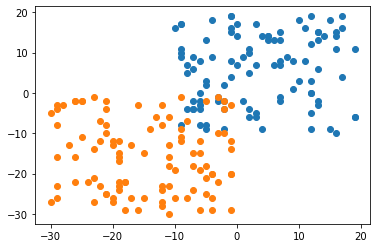

In [10]:
# Plot both distributions.  A distribution is blue, B distribution is orange.
plt.scatter(x_A,y_A)
plt.scatter(x_B,y_B)

In [11]:
# Join x and y data.
all_x = np.concatenate((x_A,x_B), axis=0)
all_y = np.concatenate((y_A,y_B), axis=0)

In [12]:
all_x, all_y

(array([ 13,  19,   7,  -5, -10,   7,  12,   0,  -9,  13,   2,  11,   9,
         -2,  -5,   7,  -2,   5,  15,  12,   3,  10,  12,  -3,  12,  -6,
          2,  16,  -7,  13,  16,  -9,  16,  -7,  -8,   7,  -5,   3,  -6,
         -7,  -4,  -9,  -1,  -9,  15,   7,  -6,  -2,  -9,  -1,  -5,  -8,
          5,  -7,  -1,  -2,   6,  16,  -6,   1,  17,  12,  -9,   1,  -1,
          5,  12,  11,   2,  -3,  -6,  13,  10,  19,  13,   4,   0,  19,
         -5,   7,   3,   2,  13,  -6,   6,   3,  -7,  -1,  12,  -1,  -4,
          0,   8,  14,  -8,  17,  17,   2,   9,   4,  -9,  -5,  -1, -21,
        -23, -19, -21, -18,  -4, -19,  -9, -19, -11, -22, -19, -12, -20,
        -29, -23,  -1, -17, -26, -20, -26, -12, -10,  -2, -12,  -1,  -5,
        -24, -11, -29, -21, -16,  -9,  -3, -23, -29, -12, -19, -20, -12,
        -11, -26,  -1, -18, -14,  -3, -15, -18, -27, -23, -26,  -2,  -4,
         -7, -19, -25, -22, -30, -21, -22,  -6, -17,  -4,  -5, -12, -15,
         -8,  -6, -11,  -6,  -8,  -5, -30,  -7, -19

In [13]:
# Unify joined data.
all_data = np.vstack((all_x, all_y)).T
all_data, all_data.shape

(array([[ 13,  15],
        [ 19,  11],
        [  7,  15],
        [ -5,  -9],
        [-10,  16],
        [  7,  -1],
        [ 12,   0],
        [  0,  17],
        [ -9,  17],
        [ 13,   6],
        [  2,  -6],
        [ 11,  16],
        [  9,   1],
        [ -2,  -9],
        [ -5,   2],
        [  7,   7],
        [ -2,   2],
        [  5,  13],
        [ 15,  18],
        [ 12,   3],
        [  3,  17],
        [ 10,  18],
        [ 12,   0],
        [ -3,  -2],
        [ 12,  -5],
        [ -6,  -4],
        [  2,  11],
        [ 16,  15],
        [ -7,   6],
        [ 13,  15],
        [ 16,  11],
        [ -9,  -8],
        [ 16, -10],
        [ -7,  -4],
        [ -8,   5],
        [  7,  -2],
        [ -5,  -8],
        [  3,  -6],
        [ -6,  -2],
        [ -7,   9],
        [ -4,   9],
        [ -9,  11],
        [ -1,  15],
        [ -9,  10],
        [ 15,  -9],
        [  7,  13],
        [ -6,   0],
        [ -2,  -2],
        [ -9,  17],
        [ -1,   4],


In [14]:
# Create labels.  A distribution = 0 (blue), B distribution = 1 (orange)
labels = np.concatenate((np.zeros(length),np.ones(length)),axis=0)
labels, labels.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 (200,))

In [15]:
# Create tree classifier object.
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=2)

In [16]:
# Train classifier tree.
fitted = clf.fit(all_data, labels)

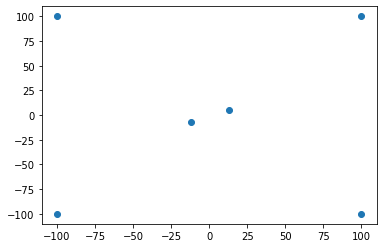

In [17]:
# Create and plot test data.  Results should be 0, 1, 0, ?, ?, 1
test_data = np.array([[13,5],[-12,-7],[100,100],[100,-100],[-100,100],[-100,-100]])
x_test,y_test = test_data.T
x_test,y_test
plt.scatter(x_test,y_test)

In [18]:
# Predict
fitted.predict(test_data)

array([0., 1., 0., 0., 1., 1.])

In [19]:
# Check probabilities (try changing max_depth of tree and see how it affects probabilities)
fitted.predict_proba(test_data)

array([[0.92523364, 0.07476636],
       [0.        , 1.        ],
       [0.92523364, 0.07476636],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

[Text(167.4, 181.2, 'X[1] <= -9.5\ngini = 0.5\nsamples = 200\nvalue = [100, 100]'),
 Text(83.7, 108.72, 'X[0] <= 7.5\ngini = 0.027\nsamples = 73\nvalue = [1, 72]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 72\nvalue = [0, 72]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 108.72, 'X[0] <= -10.5\ngini = 0.344\nsamples = 127\nvalue = [99, 28]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(292.95, 36.23999999999998, 'gini = 0.138\nsamples = 107\nvalue = [99, 8]')]

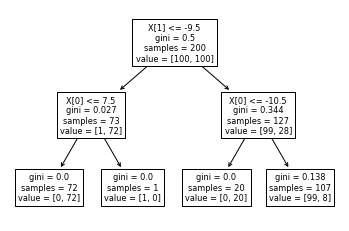

In [20]:
# Take a look at the automatically created tree and the separator nodes
tree.plot_tree(clf)

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score?

In [23]:
cross_val_score(clf, all_data, labels)

array([0.975, 0.9  , 0.95 , 0.95 , 0.925])